# What resolution do we need to measure P(vparallel| rparallel, rperp) ? 

Test tpcf(sperp, spar) to tpcf(s, mu) mapping and accuracy on multipoles (or wedges)


In [1]:
from halotools.mock_observables import rp_pi_tpcf, tpcf, s_mu_tpcf, tpcf_multipole
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
import pickle
from CentralStreamingModel.utils.read_probabilities import VD_los
from CentralStreamingModel.integral.real2redshift import compute_integrand, integrate
import tpcf_tools as tt
import seaborn as sns
import CentralStreamingModel.comparisons.models as md

sns.set_context('talk')

In [2]:
def pi_sigma2s_mu(s_center, pi_sigma, s_bins_center, mu_bins_center):

    s_mu = np.zeros((s_bins_center.shape[0], mu_bins_center.shape[0]))
    pi_sigma_interpolation = interp2d(s_center, s_center, pi_sigma, kind='linear')

    for i,s in enumerate(s_bins_center):
        for j,mu in enumerate(mu_bins_center):
            r_parallel = mu * s 
            r_perpendicular = np.sqrt(s**2 - r_parallel**2)

            s_mu[i,j] = pi_sigma_interpolation(r_parallel, r_perpendicular)

    return s_mu 
      
def get_multipoles(s, pi_sigma, s_bins, mu_bins):

    s_center = 0.5*(s[1:] + s[:-1])
    s_bins_center = 0.5*(s_bins[1:] + s_bins[:-1])

    mu_bins_center = 0.5*(mu_bins[1:] + mu_bins[:-1])
    
    s_mu = pi_sigma2s_mu(s_center, pi_sigma, s_bins_center, mu_bins_center)

    mono = tpcf_multipole(s_mu, mu_bins, order =0) 
    quad = tpcf_multipole(s_mu, mu_bins, order =2) 
    hexa = tpcf_multipole(s_mu, mu_bins, order =4) 

    return s_mu, mono, quad, hexa


In [3]:
snapshot = 11
n_boxes = range(1,15)
boxsize = 2000

box_dicts = []

for i, box in enumerate(n_boxes):
    with open(f"/raid/c-cuesta/tpcfs/redshift/box{100 + box}_s{snapshot:03d}.pickle",
              "rb") as input_file:
        redshift_dict = pickle.load(input_file)
    box_dicts.append(redshift_dict)
    
s_bins_c = redshift_dict['r']


In [8]:
s_bins = np.arange(0., 50.,1)
s_bins[0] += 0.0001
n_mu_bins = 60
mu_bins = np.linspace(0.,1.,n_mu_bins)
mu_bins_c = 0.5 * (mu_bins[1:] + mu_bins[:-1])
levels = np.arange(-4, 1, 0.3)


********************* BOX 1 ***************************


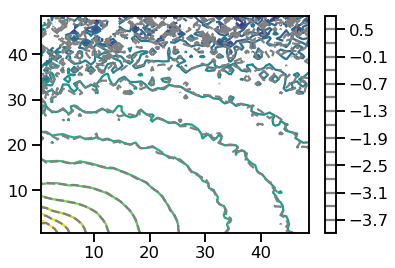

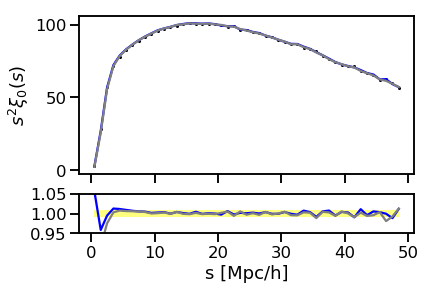

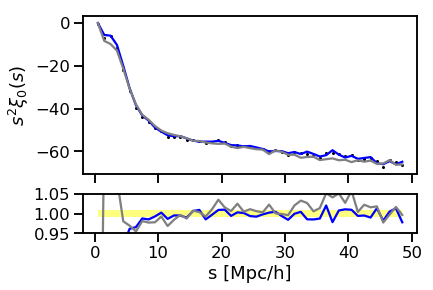

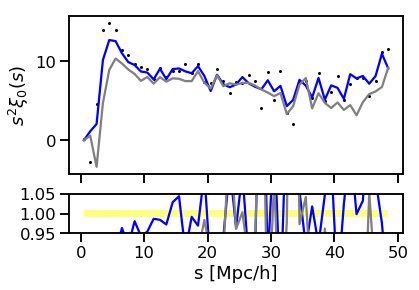

********************* BOX 2 ***************************


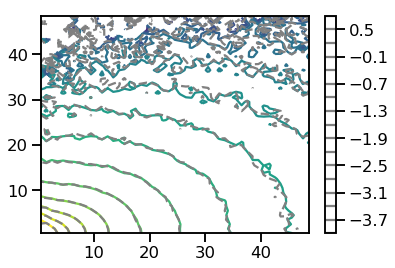

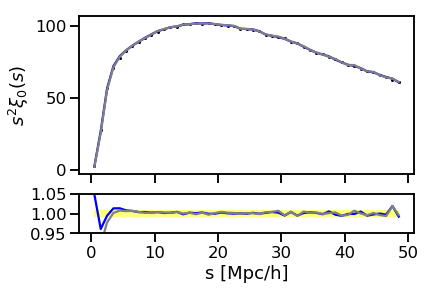

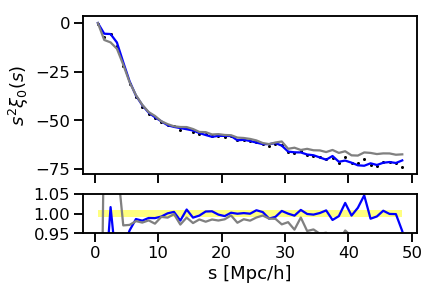

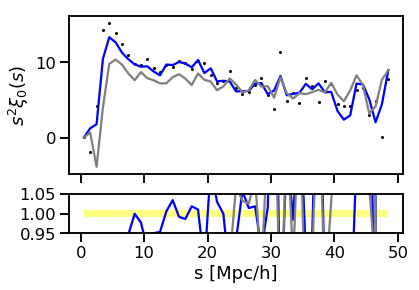

********************* BOX 3 ***************************


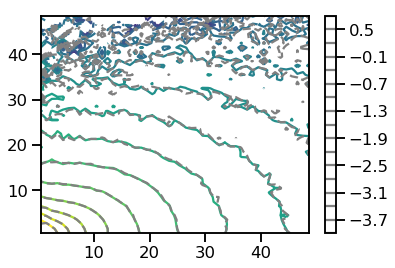

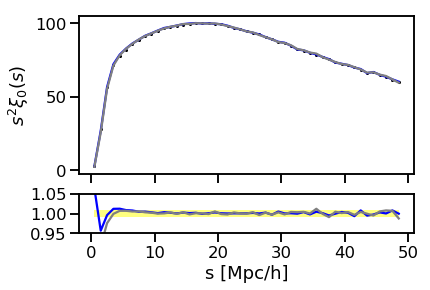

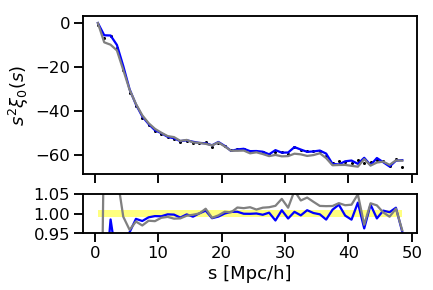

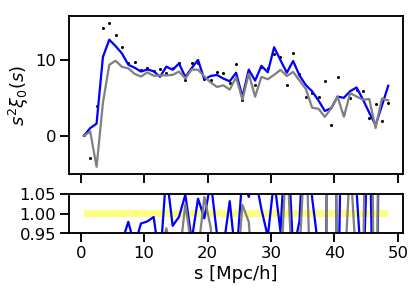

********************* BOX 4 ***************************


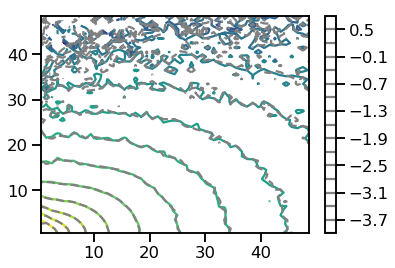

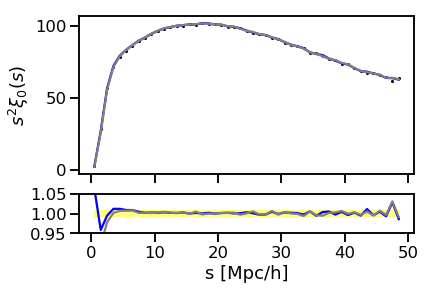

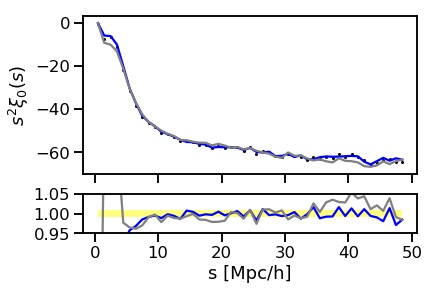

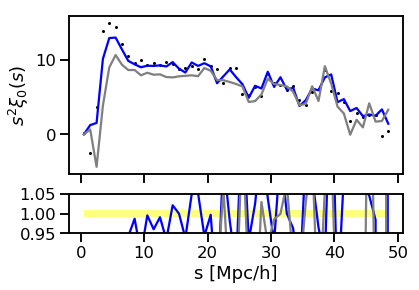

********************* BOX 5 ***************************


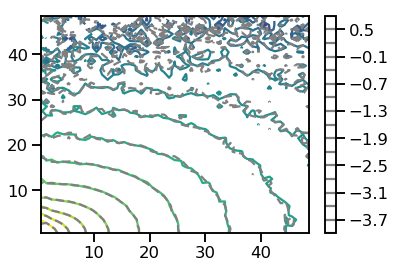

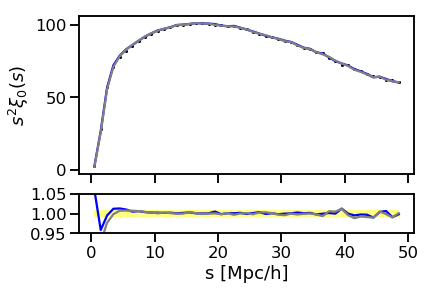

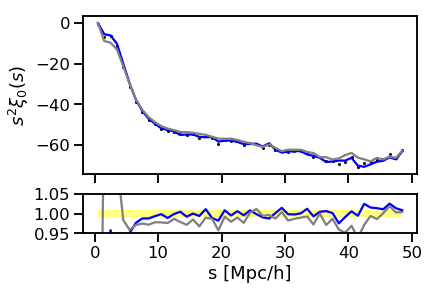

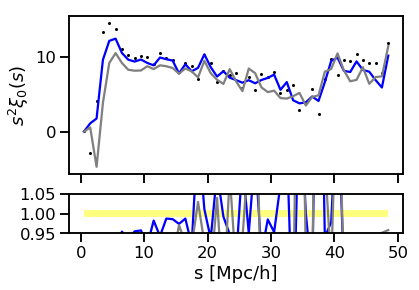

********************* BOX 6 ***************************


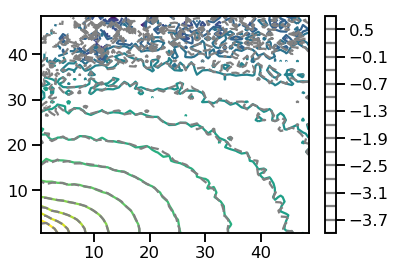

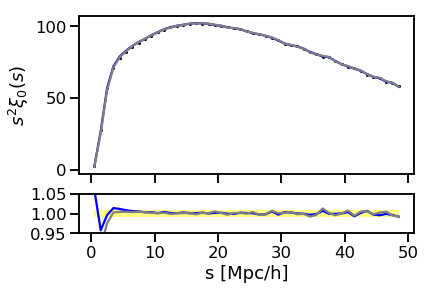

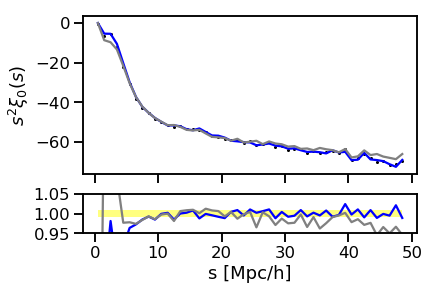

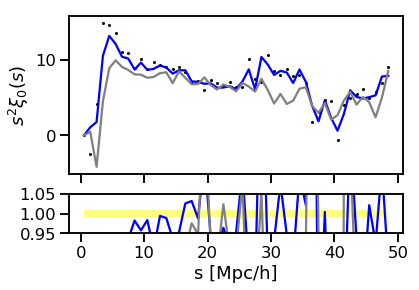

********************* BOX 7 ***************************


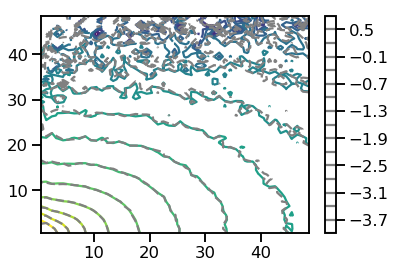

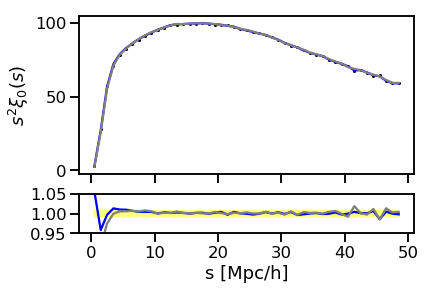

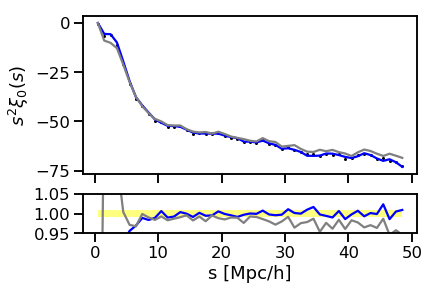

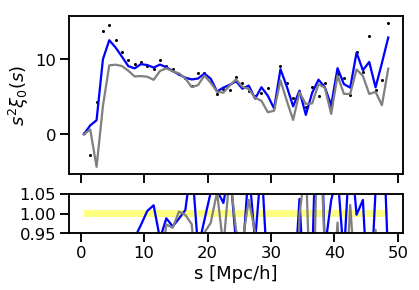

********************* BOX 8 ***************************


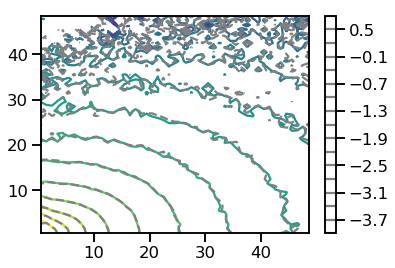

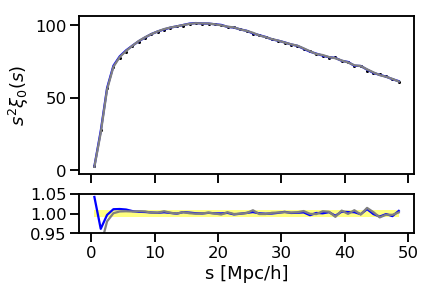

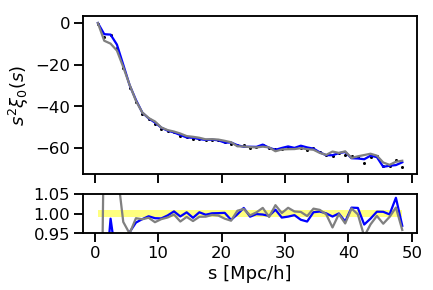

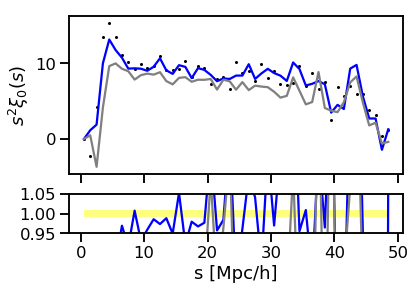

********************* BOX 9 ***************************


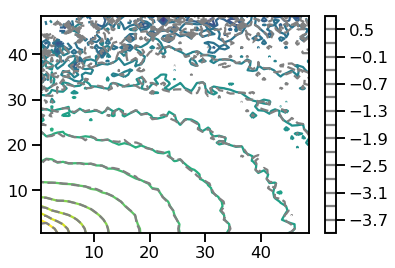

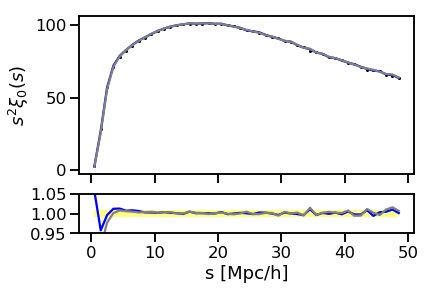

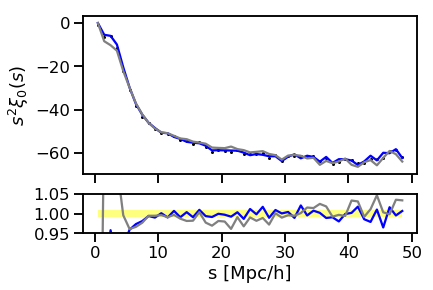

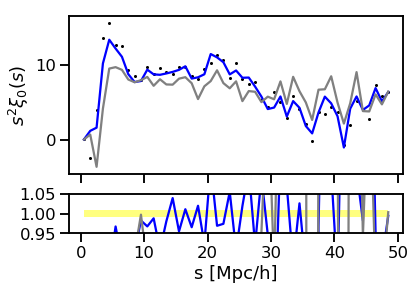

********************* BOX 10 ***************************


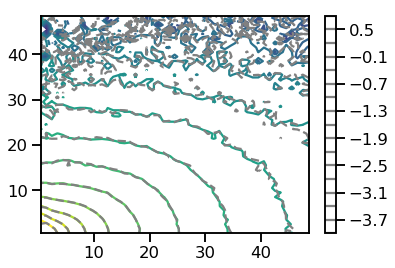

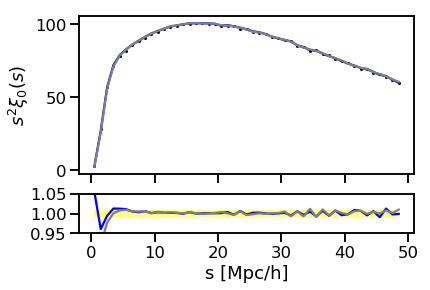

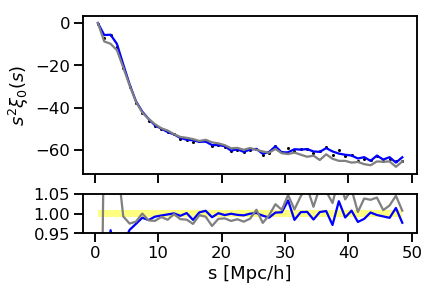

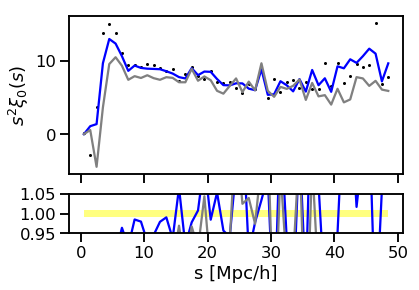

********************* BOX 11 ***************************


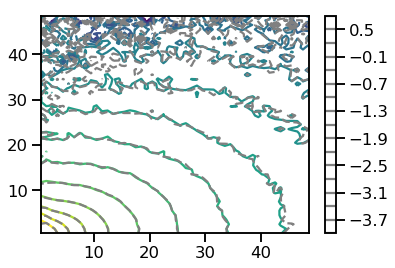

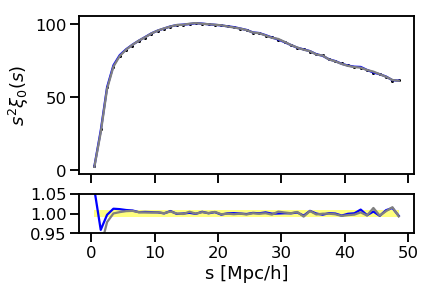

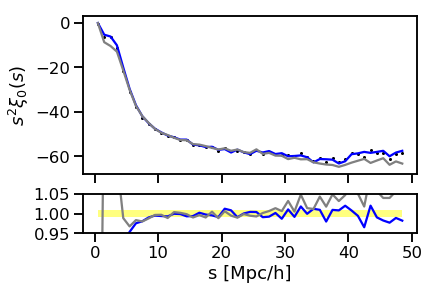

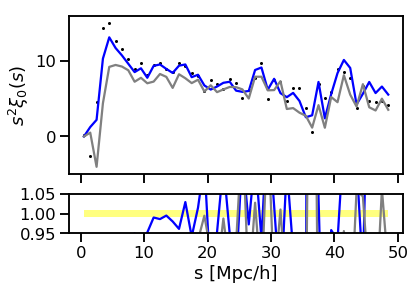

********************* BOX 12 ***************************


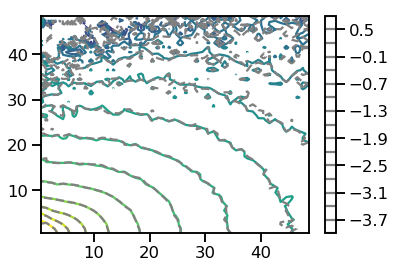

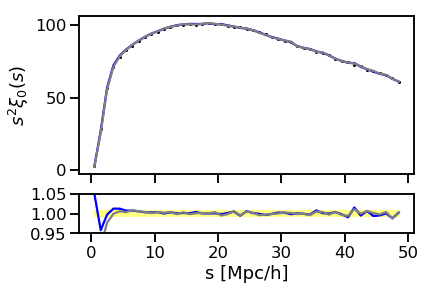

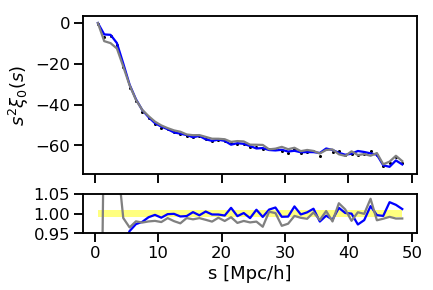

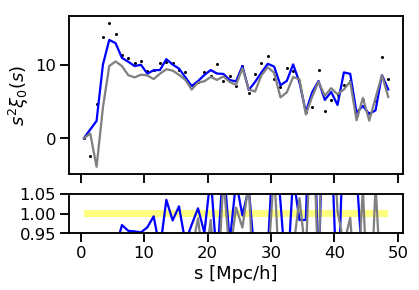

********************* BOX 13 ***************************


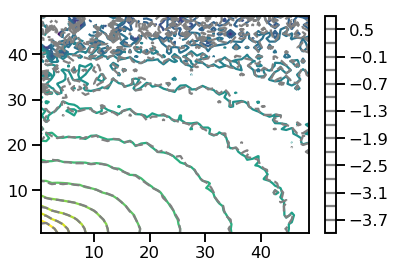

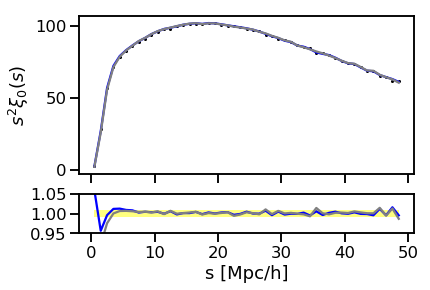

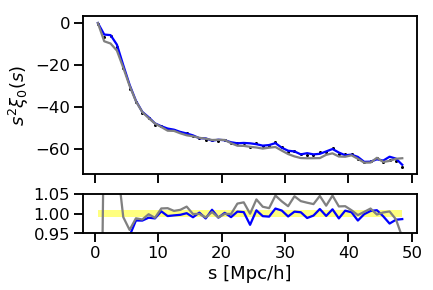

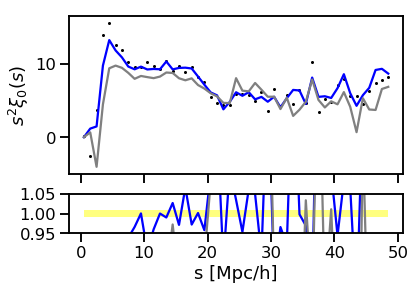

********************* BOX 14 ***************************


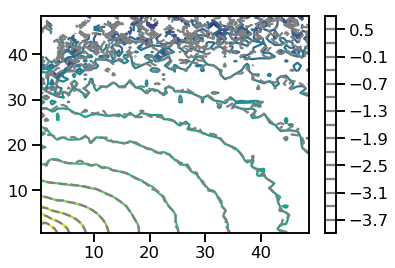

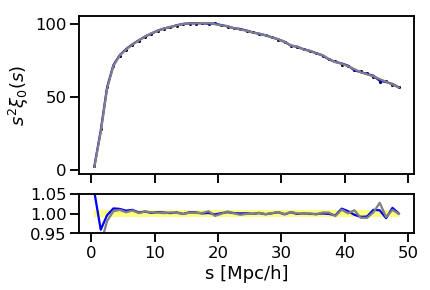

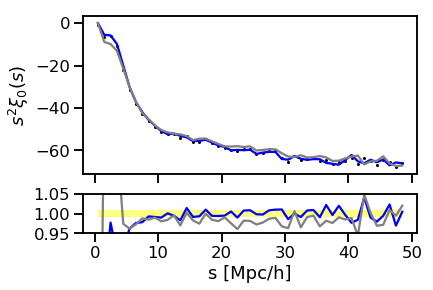

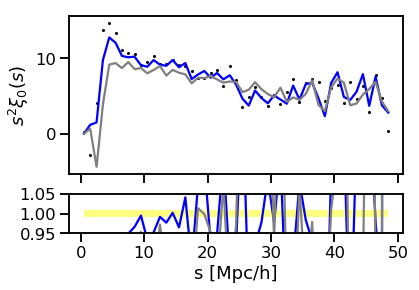

In [9]:
for i, box in enumerate(n_boxes):
    
    print(f'********************* BOX {box} ***************************')
    
    s_mu_interp, mono_interp, quad_interp, hexa_interp =  tt.get_multipoles(s_bins,
                                    box_dicts[i]['pi_sigma'],
                                    s_bins, mu_bins)
    rs = []
    rs.append(md.RedshiftSpace(box, boxsize, snapshot, extra = 'lowres'))
    mean_rs = md.MeanRedshiftSpace( boxsize, snapshot, rs)

    plt.contour(redshift_dict['r'], redshift_dict['r'],
                 np.log10(box_dicts[i]['pi_sigma']).T, levels=levels)

    colors = [mean_rs.streaming.color] * len(levels)
    plt.contour(mean_rs.streaming.s_c, mean_rs.streaming.s_c,
                np.log10(mean_rs.streaming.pi_sigma).T,
               levels=levels, colors=colors, linestyles='dashed')

    plt.colorbar()
    plt.show()
    s_mu_interp_stream, mono_interp_stream, quad_interp_stream, hexa_interp_stream =  tt.get_multipoles(mean_rs.streaming.s,
                                                        mean_rs.streaming.pi_sigma,
                                                        s_bins, mu_bins)
    


    fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, 
                    squeeze = True, gridspec_kw = {'height_ratios':[4,1]})

    ax1.plot(s_bins_c, s_bins_c * s_bins_c * box_dicts[i]['mono'], 
            linestyle='', marker='o', markersize=2, color='black')
    ax1.plot(s_bins_c, s_bins_c * s_bins_c *mono_interp,
             linestyle='-', label='Interpolated', color = 'blue')
    ax1.plot(s_bins_c, s_bins_c * s_bins_c *mono_interp_stream,
             linestyle='-', label='Interpolated Stream', color = 'gray')


    ax2.plot(s_bins_c, (mono_interp)/box_dicts[i]['mono'], color = 'blue')

    ax2.plot(s_bins_c, (mono_interp_stream )/box_dicts[i]['mono'], color = 'gray')
    ax2.fill_between(s_bins_c, 0.99, 1.01, facecolor = 'yellow', alpha = 0.5)
    ax2.set_ylim(0.95,1.05)

    #plt.legend()
    ax2.set_xlabel('s [Mpc/h]')
    ax1.set_ylabel(r'$s^2 \xi_0(s)$')
    
    plt.show()
    
    
    fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, 
                    squeeze = True, gridspec_kw = {'height_ratios':[4,1]})

    ax1.plot(s_bins_c, s_bins_c * s_bins_c * box_dicts[i]['quad'], 
            linestyle='', marker='o', markersize=2, color='black')
    ax1.plot(s_bins_c, s_bins_c * s_bins_c *quad_interp,
             linestyle='-', label='Interpolated', color = 'blue')
    ax1.plot(s_bins_c, s_bins_c * s_bins_c *quad_interp_stream,
             linestyle='-', label='Interpolated Stream', color = 'gray')


    ax2.plot(s_bins_c, (quad_interp)/box_dicts[i]['quad'], color = 'blue')

    ax2.plot(s_bins_c, (quad_interp_stream )/box_dicts[i]['quad'], color = 'gray')
    ax2.fill_between(s_bins_c, 0.99, 1.01, facecolor = 'yellow', alpha = 0.5)
    ax2.set_ylim(0.95,1.05)

    #plt.legend()
    ax2.set_xlabel('s [Mpc/h]')
    ax1.set_ylabel(r'$s^2 \xi_0(s)$')
    plt.show()
    
    fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, 
                    squeeze = True, gridspec_kw = {'height_ratios':[4,1]})

    ax1.plot(s_bins_c, s_bins_c * s_bins_c * box_dicts[i]['hexa'], 
            linestyle='', marker='o', markersize=2, color='black')
    ax1.plot(s_bins_c, s_bins_c * s_bins_c *hexa_interp,
             linestyle='-', label='Interpolated', color = 'blue')
    ax1.plot(s_bins_c, s_bins_c * s_bins_c *hexa_interp_stream,
             linestyle='-', label='Interpolated Stream', color = 'gray')


    ax2.plot(s_bins_c, (hexa_interp)/box_dicts[i]['hexa'], color = 'blue')

    ax2.plot(s_bins_c, (hexa_interp_stream )/box_dicts[i]['hexa'], color = 'gray')
    ax2.fill_between(s_bins_c, 0.99, 1.01, facecolor = 'yellow', alpha = 0.5)
    ax2.set_ylim(0.95,1.05)

    #plt.legend()
    ax2.set_xlabel('s [Mpc/h]')
    ax1.set_ylabel(r'$s^2 \xi_0(s)$')
    plt.show()